In [ ]:
!pip install matplotlib pandas numpy

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def kernel(point, X, k):
    m = X.shape[0]
    weights = np.mat(np.eye(m))
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k ** 2))
    return weights


def local_weight(point, X, y, k):
    wei = kernel(point, X, k)
    return (X.T * (wei * X)).I * (X.T * (wei * y.T))


def local_weight_regression(X, y, k):
    m = X.shape[0]
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] = X[i] @ local_weight(X[i], X, y, k)
    return y_pred

In [3]:
data = pd.read_csv("datasets/6-weighted-regression.csv")
bill = np.array(data.total_bill)
tip = np.array(data.tip)

bill_matrix = np.mat(bill)
y = np.mat(tip)

m = bill_matrix.shape[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T, bill_matrix.T))

y_pred = local_weight_regression(X, y, 0.9)
sorted_indices = X[:, 1].argsort(0)
sorted_X = X[sorted_indices][:, 0]

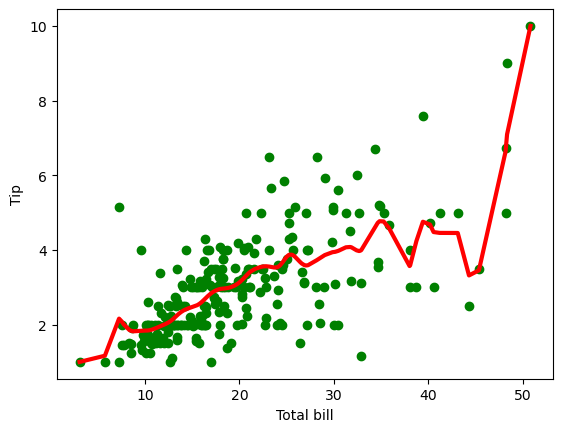

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(bill, tip, color='green')
ax.plot(sorted_X[:, 1], y_pred[sorted_indices], color='red', linewidth=3)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()